In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('C:/Users/ramya/Documents/Asterisc Intern/Data Science Intern Projects/Stock Price Prediction/TASK02-20230930T161243Z-001/TASK02/INR=X.csv')
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
5,2020-02-03,71.544998,71.699997,71.265503,71.496498,71.496498,0
6,2020-02-04,71.314102,71.514999,71.084999,71.314102,71.314102,0
7,2020-02-05,71.100403,71.279999,71.099899,71.099998,71.099998,0
8,2020-02-06,71.181000,71.397499,71.121002,71.180000,71.180000,0
9,2020-02-07,71.470001,71.570999,71.177498,71.470001,71.470001,0


In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
5,2020-02-03,71.544998,71.699997,71.265503,71.496498,71.496498,0
6,2020-02-04,71.314102,71.514999,71.084999,71.314102,71.314102,0
7,2020-02-05,71.100403,71.279999,71.099899,71.099998,71.099998,0
8,2020-02-06,71.181000,71.397499,71.121002,71.180000,71.180000,0
9,2020-02-07,71.470001,71.570999,71.177498,71.470001,71.470001,0


In [24]:
features = df[['Close']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, df['Close'], test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.0
Mean Absolute Error: 0.0


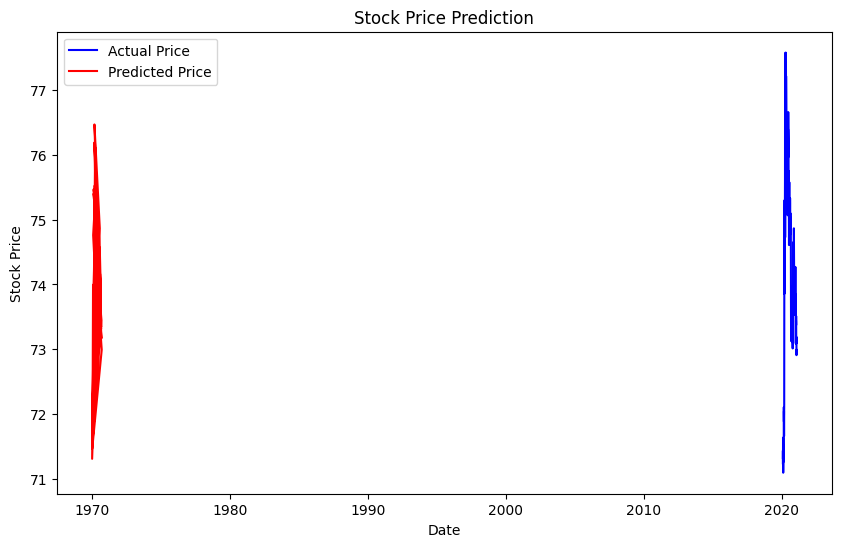

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price', color='b')
plt.plot(X_test.index, y_pred, label='Predicted Price', color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price Prediction')
plt.show()

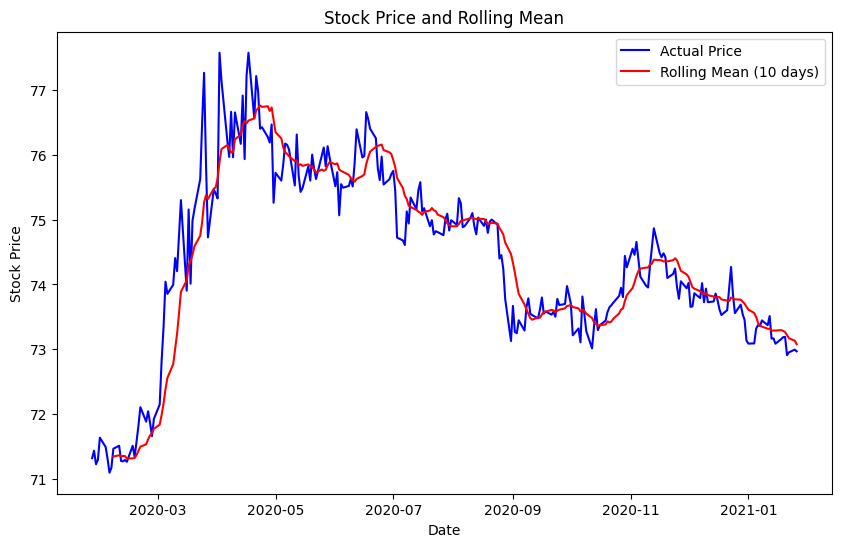

In [30]:
window_size = 10
rolling_mean = df['Close'].rolling(window=window_size).mean()
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price', color='b')
plt.plot(df['Date'], rolling_mean, label=f'Rolling Mean ({window_size} days)', color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price and Rolling Mean')
plt.show()